In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as anim
from skimage import color

#### Functions
(For image processing)

In [7]:
coef = [0.299, 0.587, 0.114] # R, G, B coefficients for conversion to grayscale, respectively

def rgb_to_gray(folder, l, P1):
    '''converts images to grayscale'''
    # 1
    if l == 'bg':
        file = f'{folder}/background.png'
    else:
        file = f'{folder}/l={l}, P1={P1}.png' # get filename
    
    img = plt.imread(f'{file}') # import the image as an array of RGB values per pixel
    
    # 2.
    # copy the values to a new array (I am not allowed to operate directly on the imported image)
    # mod = img.copy().astype('float64')
    # for i, c in enumerate(coef):
    #     mod[:,:,i] *= c # multiply the ith color value by its corresponding coefficient
    #                     # (e.g. 0 (red - first of the three) : 0.299 (multiplication factor))
    # gray = np.sum(mod, axis=2) # sum the RGB values per pixel
    
    # 2 alt - skimage
    gray = color.rgb2gray(img)
    return gray

In [26]:
def store_imgs(folder, l_min, l_max, l_inc, p1_min, p1_max=1):
    '''stores the image arrays into one array.'''
    bg_gray = rgb_to_gray(folder, l='bg', P1='') # get the background image
    l_arr = np.round(np.arange(l_min, l_max+l_inc, l_inc), 2)
    if p1_min == p1_max:
        p1_arr = [p1_min]
    else:
        p1_arr = np.round(np.linspace(start=p1_min, stop=p1_max, num=11), 2)
    
    imgs = [] # list of image arrays

    # process and store the image arrays
    for l in l_arr:
        for p1 in p1_arr:
            gray = rgb_to_gray(folder, l=l, P1=p1) #- bg_gray
            gray /= np.max(gray)
            imgs.append(gray)

    imgs = np.array(imgs).reshape(len(l_arr), len(p1_arr), 2016, 2016)
    return imgs

come up with a common function for animation. That is, learn how to write animation function that takes multiple arguments.

03-07-2024 - as of now, I need to define a new animation function for each set of images, because I only know how to write animation function that takes only one argument.

[low prio] additional cleaning for displaying images. (see previous versions of this notebook)

### integer $l$, varying phase completeness

for fixing - labels should be $l \in [1, 5]$ not $l \in [0, 4]$

In [13]:
# plot_grid_imgs(int_imgs) # shape (5, 11)

#### "raw" intensity profile
sum of all pixel values

refer to: Baluyot & Hermosa, "Intensity profiles and propagation of optical
beams with bored **helical** phase"

In [16]:
LG_i_sums = get_sum_pixels(int_imgs)

mod for presentation (optional):
- normalization to a higher maximum: increase the intensity of the beams without changing the relative intensities betw. pics
- but use raw images for data analysis!

#### cylindrical lens
12/02/2024
Alperin, et al. 2016

In [19]:
# plot_grid_imgs(cyl_int_imgs)

for now, only the complete phase (P1=1.0) is animated

In [26]:
def show_im_cyl_int(n):
    img = cyl_int_imgs[n, -1, :, :]
    ax.clear()
    ax.imshow(img, cmap='hot', animated=True)
    ax.set_title(f'l = {n}')

In [28]:
%matplotlib tk
fig, ax = plt.subplots()

animate = anim.FuncAnimation(fig, show_im_cyl_int, frames=cyl_int_imgs.shape[0],
                             interval=100, repeat_delay=1000)
plt.show()
# animate.save(filename='rotating_fringes.gif', writer='pillow')

# fig.clf()

sum of pixel values

### fractional $l$ = varying phase completeness

method: cylindrical lens

increments of 0.2, $l \in [3, 5]$ (ignore the labels at the extreme left - they're wrong)\
03-07-2024 So far, operating on __complete__ phase, to verify if taking the centroid is a suitable method to measure OAM (method in Alperin's paper)

### fractional $l$ = complete phase only

#### cylindrical lens

In [ ]:
# plot_grid_imgs(cyl_frac_imgs)

Animate only the complete phase

##### centroid
For images of beams passed through cylindrical lens
centroid ~ center of mass (where mass : intensity)

#### raw intensity profiles
Can I use the known raw beam profile corresponding to topological charges to tell the __effective__ $l$ of incomplete phase?

In [27]:
frac_imgs = store_imgs(folder='02-20-2024 frac l', l_min=3.0, l_max=5.0, l_inc=0.1, p1_min=1.0)
frac_imgs.shape # (21, 1, 2016, 2016)

(21, 1, 2016, 2016)

Text(0.5, 0.98, 'Intensity profiles of LG beams for $l \\in [3.0,5.0]$, 0.1 interval')

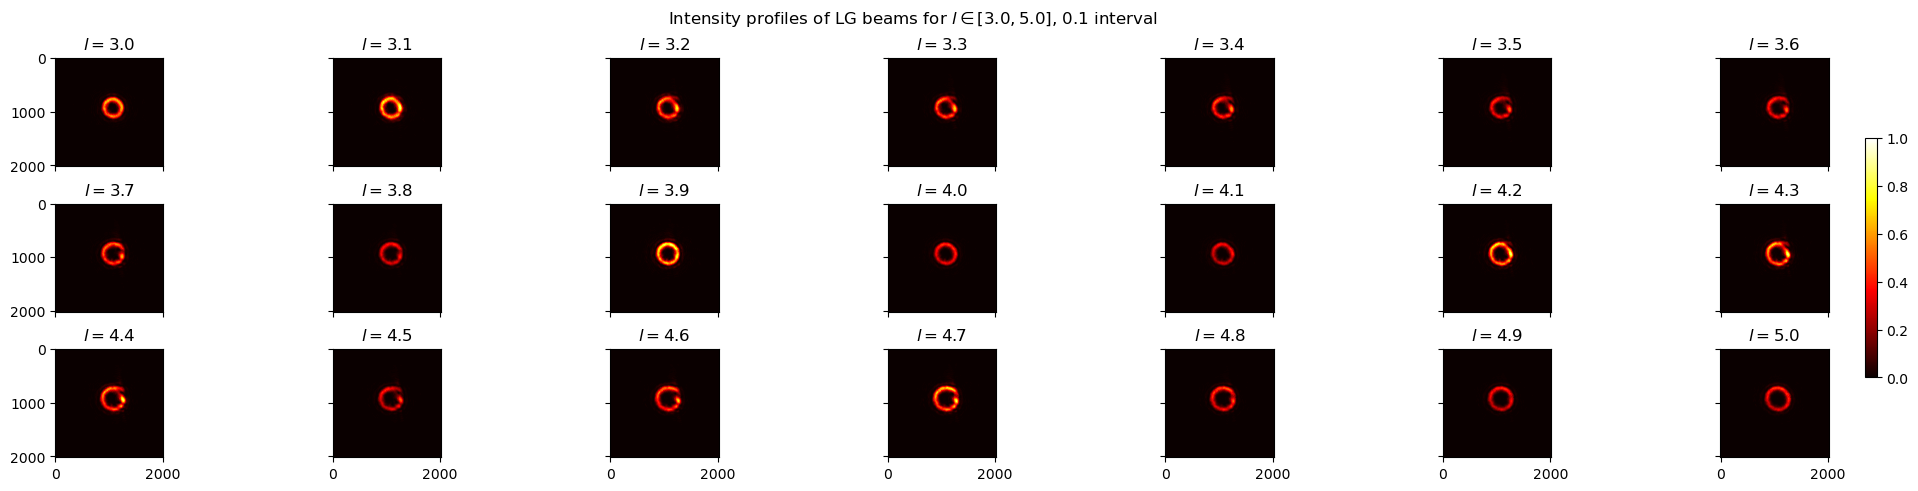

In [69]:
%matplotlib inline
# plot of fractional topological charges (P1=1.0)
lnum = frac_imgs.shape[0] #21 

fig, axs = plt.subplots(3, lnum//3, layout='constrained', gridspec_kw={'wspace':0.05, 'hspace':0.05}, 
                        figsize=(20, 4.8), sharex=True, sharey=True)

for (i, ax) in enumerate(axs.flat):
    im = ax.imshow(frac_imgs[i, 0, :, :], cmap='hot')
    ax.set_title(f'$l=${np.round(3.0 + i*0.1, 2)}')

# default fig size: [6.4, 4.8]
fig.colorbar(im, ax=axs, shrink=0.6, pad=0.01)
fig.suptitle('Intensity profiles of LG beams for $l \in [3.0,5.0]$, 0.1 interval')

[convert the next two cells to code when you need to export the animation (for presentation)]

In [37]:
def show_im_frac(n):
    img = frac_imgs[n, -1, :, :]
    ax.clear()
    ax.imshow(img, cmap='hot', animated=True)
    ax.set_title(f'l = {np.round(3.0 + n*0.1, 2)}')

In [39]:
%matplotlib tk
fig, ax = plt.subplots()

animate = anim.FuncAnimation(fig, show_im_frac, frames=frac_imgs.shape[0],
                             interval=10, repeat_delay=50)
plt.show()
animate.save(filename='frac_l.gif', writer='pillow')

# fig.clf()

Now plot the centroid __w.r.t. centroid at $l=0$__

So far, the intensity centroid does not exhibit any clear relationship with topological charge. __Failed to replicate the graphs of Alperin (2016)__

#### Single mode fiber
Projection of a Gaussian mode onto a shaped beam as the beam travels through the optical fiber. Voltage read from an oscilloscope.

##### With mean calculated by oscilloscope
I took the mean, which was displayed by the oscilloscope. Since the value fluctuates, I recorded the first value I saw 4 seconds after changing the $l$.

Read data and subtract background (mean voltage, in __mV__).\
Gain:
\begin{equation}
gain = 10 \log\left(\frac{V_2}{V_1}\right)\\
ratio = \frac{V_2}{V_1} = 10^{\frac{gain}{10}}
\end{equation}

In [29]:
# varying l
V_mean_l = pd.read_excel('SMF V data.xlsx', sheet_name='V_mean_l', index_col=0, header=0)
V_mean_l.index.rename('$l$', inplace=True)

# subtract background from both datasets
V_bg = 80.7  # background signal [mV]
V_mean_l -= V_bg

# scale down (remove the gain from photodetector)
gain_dB = 40 # dB
ratio = 10**(gain_dB / 10) # dimensionless

V_mean_l /= ratio

V_mean_l['err'] = 0.0001

In [30]:
V_mean_l

,mean V,err
$l$,,
0.00,0.01423,0.0001
0.05,0.01423,0.0001
0.10,0.01293,0.0001
0.15,0.01213,0.0001
0.20,0.01193,0.0001
...,...,...
4.60,-0.00024,0.0001
4.70,-0.00024,0.0001
4.80,-0.00014,0.0001


Plot. Highlight the coordinates of:
- max
- min

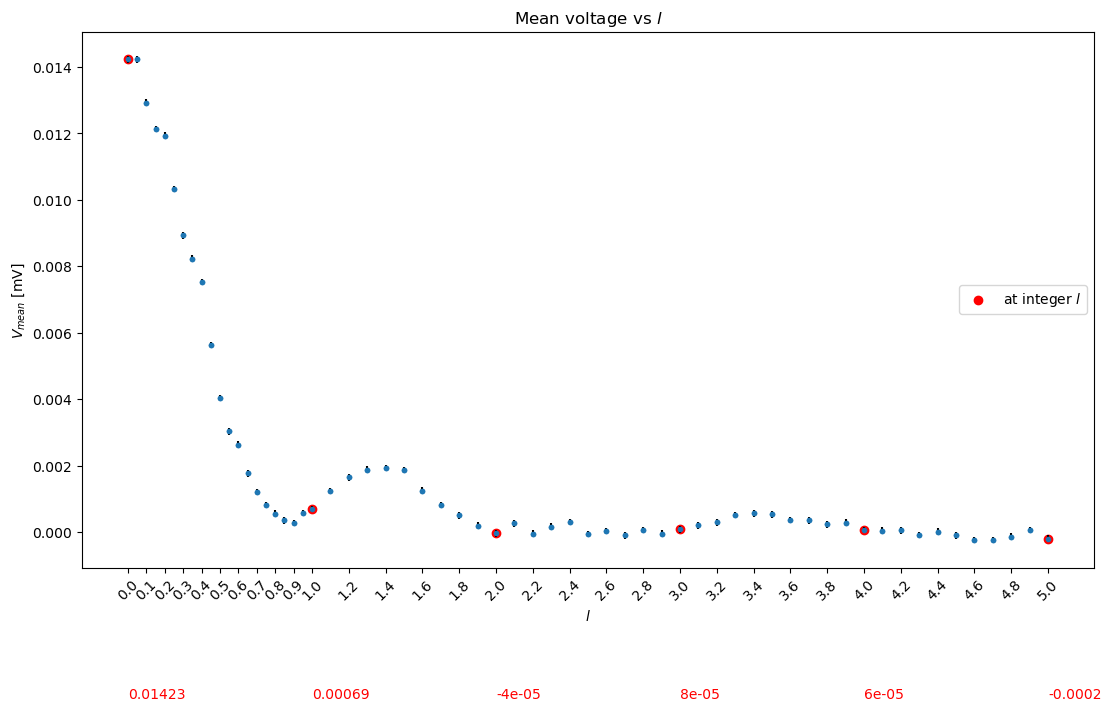

In [34]:
fig, ax = plt.subplots(layout='constrained', figsize=[11., 7.])

# plot values
ax.scatter(l, V_mean_l['mean V'], marker='.')
ax.errorbar(x=l, y=V_mean_l['mean V'], yerr=V_mean_l['err'], fmt='.', ecolor='black')

# highlight integer values
l = V_mean_l.index
V_intl = V_mean_l[l%1==0]

ax.scatter(V_intl.index, V_intl['mean V'], marker='o', color='red', label='at integer $l$')

for i, val in V_intl.iterrows():
    ax.annotate(text=np.round(V_intl.loc[i, 'mean V'], 5), xy=(i, val['mean V']), xytext=(i, -0.005), color='red')

# plot parameters
ax.set(xlabel='$l$', ylabel='$V_{mean}$ [mV]', xticks=l[::2], 
          title=f'Mean voltage vs $l$')
ax.tick_params(axis='x', labelrotation=45)
ax.legend(loc='center right')

### to do - analysis
- Should I curvefit?
- test your functions, draw them out if you have to.
- from literature, come up with other ways to quantify the OAM of beams (complete phase)

### Outlook

Other methods to characterize vortices: single mode fiber, interferometry.
I also captured images of _negative_ topological charge through a cylindrical lens (not yet included in this notebook; I don't know if I will include it because there's nothing unexpected).

What can I find using my results?
- What is the threshold of the cylindrical lens being an effective way to quantify OAM? (based off Alperin)
- Try **fractional topological charge** (the Russian paper)
- What now is the topological charge when, for some initial l, the phase is more and more incomplete?


More data processing to try:
- Radon transform. What pattern will arise? With respect to what? is it more useful?
- get the centroid
- ~mode projection??~